In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

In [2]:
na_values = ['NaN','N/A']
df = pd.read_csv("Data\house-data.csv",na_values=na_values)

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Checking for undefined values

In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Checking datatypes

In [5]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# Setting date to datetime object instead of string

In [6]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

In [7]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

# Visually showcasing prices

finding min and max price for intervals

In [8]:
df['price'].max()

7700000.0

In [9]:
df['price'].min()

75000.0

In [10]:
num_bins = [75000,200000,700000,800000,900000,1000000,7700000]
price_intervals = pd.cut(df['price'],bins=num_bins)
price_intervals

0        (200000, 700000]
1        (200000, 700000]
2         (75000, 200000]
3        (200000, 700000]
4        (200000, 700000]
               ...       
21608    (200000, 700000]
21609    (200000, 700000]
21610    (200000, 700000]
21611    (200000, 700000]
21612    (200000, 700000]
Name: price, Length: 21613, dtype: category
Categories (6, interval[int64, right]): [(75000, 200000] < (200000, 700000] < (700000, 800000] < (800000, 900000] < (900000, 1000000] < (1000000, 7700000]]

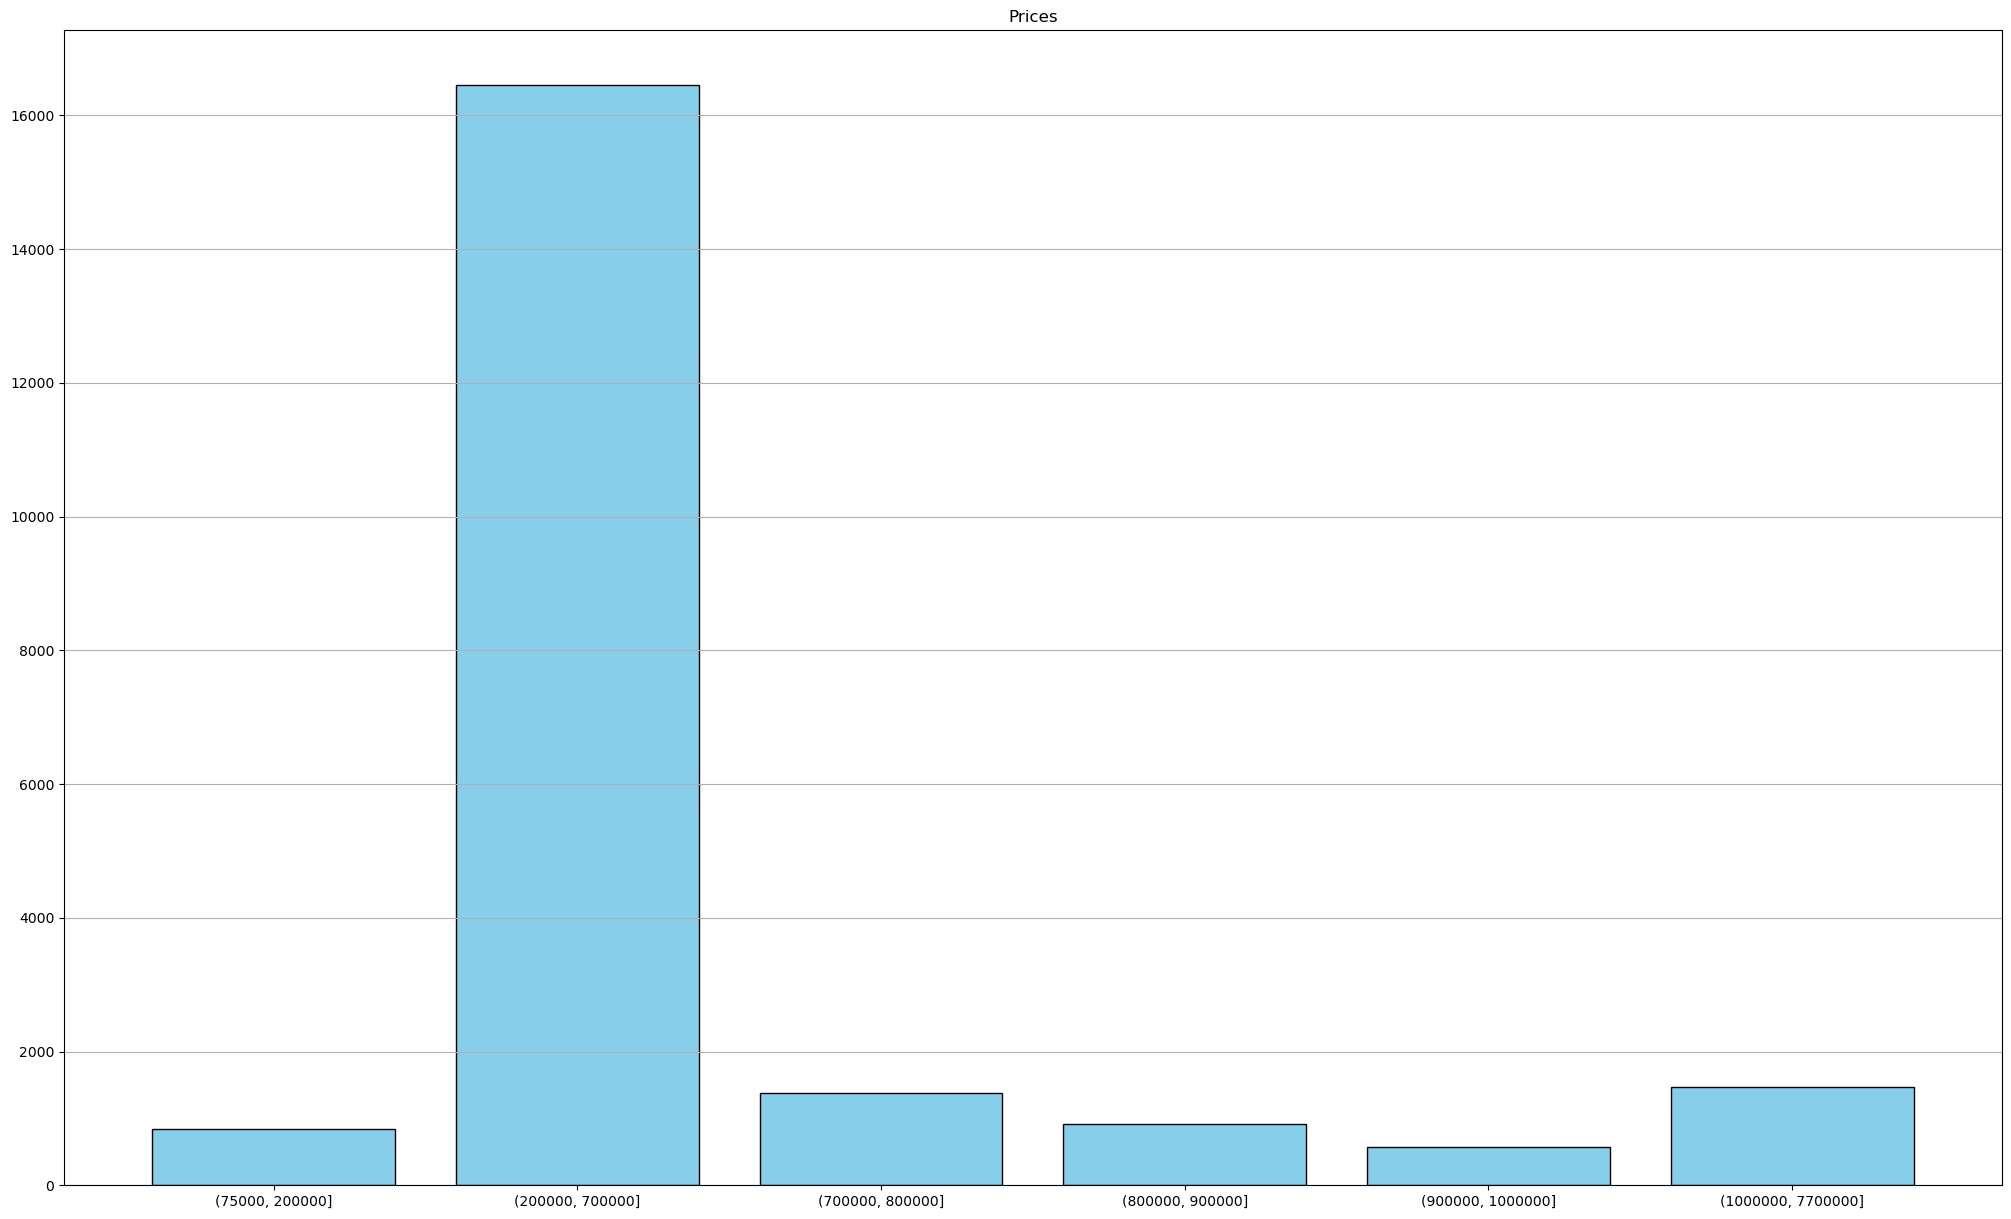

In [11]:
grouped_price_interval = df.groupby(price_intervals)
interval_counts = grouped_price_interval.size()

plt.figure(figsize=(25, 15))
plt.bar(interval_counts.index.astype(str), interval_counts.values, color='skyblue', edgecolor='black')
plt.grid(axis='y')  
plt.title('Prices')
plt.show()

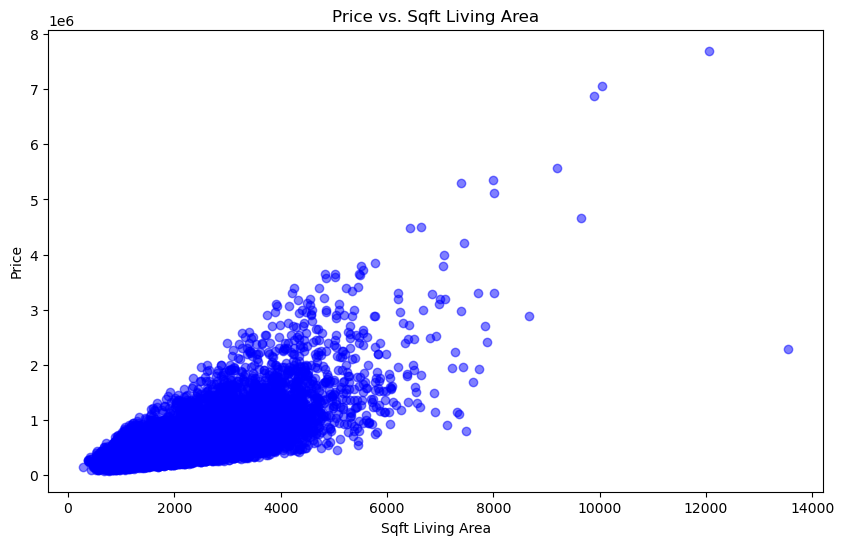

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df['sqft_living'], df['price'], color='blue', alpha=0.5)
plt.title('Price vs. Sqft Living Area')
plt.xlabel('Sqft Living Area')
plt.ylabel('Price')
plt.show()

# Checking relationship between variables

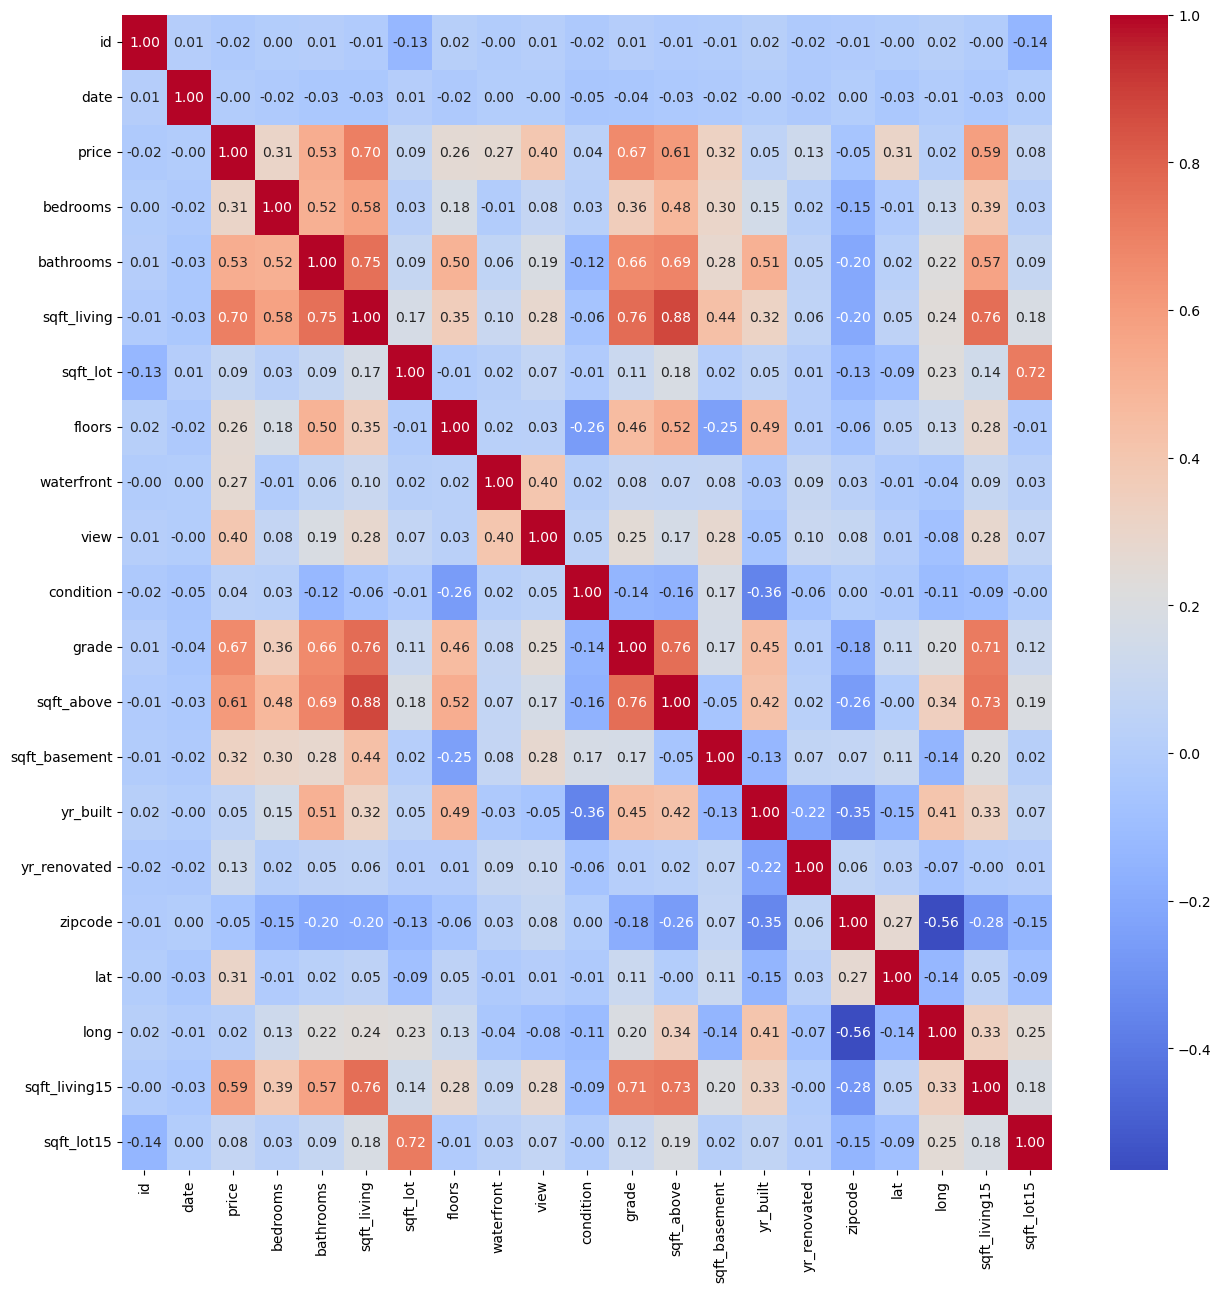

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

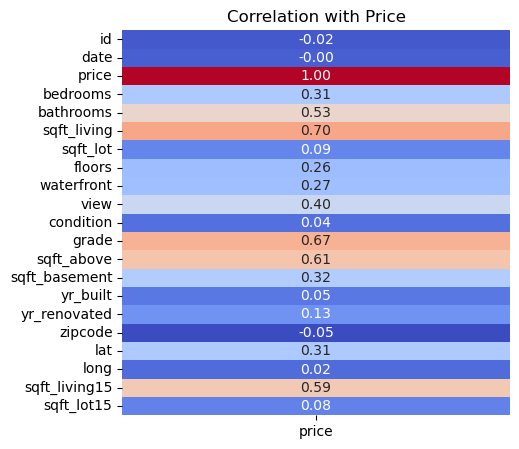

In [14]:
correlation_matrix_price = correlation_matrix['price']

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix_price.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Correlation with Price')
plt.show()

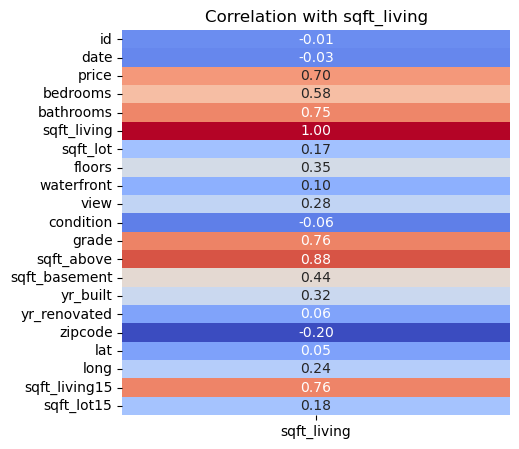

In [15]:
correlation_matrix_sqft_living = correlation_matrix['sqft_living']

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix_sqft_living.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Correlation with sqft_living')
plt.show()

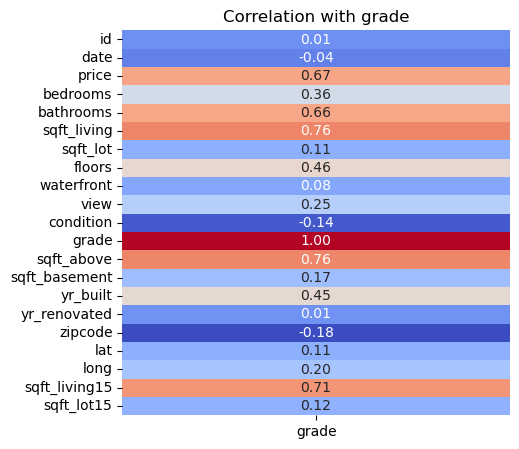

In [16]:
correlation_matrix_grade = correlation_matrix['grade']

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix_grade.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Correlation with grade')
plt.show()

# Making model using liniar regression to predict price, and choosing sqft_living as independent variable, since it has highest correlation with price.

In [17]:
x = df['sqft_living'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=123,test_size=0.15)

In [19]:
myreg = LinearRegression()

In [20]:
myreg.fit(x_train,y_train)

LinearRegression()

In [21]:
y_predicted = myreg.predict(x_test)

In [22]:
myreg.score(x,y)

0.49279845827805924

Udregning af R2 med r2_score funktionen, og modellen forklare 52 procent af punkterne.

In [23]:
from sklearn.metrics import r2_score

r2_score(y_test, y_predicted)

0.5200264685862173

# Trying to improve model using multi linar regression

Taking the variables that had a strong positive relationship with price as predictor variables.

In [24]:
predictor_variables = ['sqft_living','grade','sqft_living15','bathrooms','bedrooms','waterfront','view','sqft_above','floors']
x = df[predictor_variables]

x.head()

,sqft_living,grade,sqft_living15,bathrooms,bedrooms,waterfront,view,sqft_above,floors
0,1180,7,1340,1.00,3,0,0,1180,1.0
1,2570,7,1690,2.25,3,0,0,2170,2.0
2,770,6,2720,1.00,2,0,0,770,1.0
3,1960,7,1360,3.00,4,0,0,1050,1.0
4,1680,8,1800,2.00,3,0,0,1680,1.0


In [25]:
y = df['price']

y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

Splitting the data into training and test sets.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

Doing liniar regression with the training sets, to train my model.

In [27]:
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

In [28]:
list(zip(predictor_variables, linreg.coef_))

[('sqft_living', 219.167546226953),
 ('grade', 100341.93774775723),
 ('sqft_living15', 5.898533315754321),
 ('bathrooms', -20726.119060920664),
 ('bedrooms', -26090.17495247698),
 ('waterfront', 582728.2435799495),
 ('view', 57334.481406647916),
 ('sqft_above', -45.55475178892084),
 ('floors', -6079.44488513004)]

Using my model to predict y values for the x test data part.

In [29]:
y_predicted = linreg.predict(X_test)

In [30]:
y_predicted

array([737485.92511046, 384971.28536318, 949003.01765623, ...,
       735796.75216775, 224896.20081584, 429185.65231256])

Checking MSE by comparing my prediction to the y test set.

In [31]:
metrics.mean_absolute_error(y_test, y_predicted)

153824.53874036783

In [32]:
metrics.mean_squared_error(y_test, y_predicted)

64171074740.9184

Getting the explained variance and R2 score. This model explains about 64 percent of the data in the dataset.

In [33]:
eV = round(sm.explained_variance_score(y_test, y_predicted), 6)
eV

0.599755

In [34]:
r2_score(y_test, y_predicted)

0.5992348484378929

Visually showing the predicted and actual values.

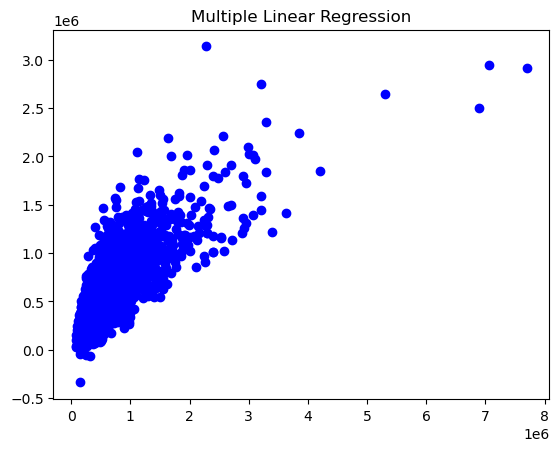

In [35]:
plt.title('Multiple Linear Regression')
plt.scatter(y_test, y_predicted, color='blue')
plt.show()

# Making a model using polynomial regression 

In [100]:
predictor_variables = ['sqft_living','grade','sqft_above']

x = df[predictor_variables].values
y = df['price'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)

model = LinearRegression()
model.fit(X_train_poly, y_train)

X_test_poly = poly.transform(X_test)
predictions = model.predict(X_test_poly)

In [101]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 57321249627.92635
R-squared: 0.6420137984658523


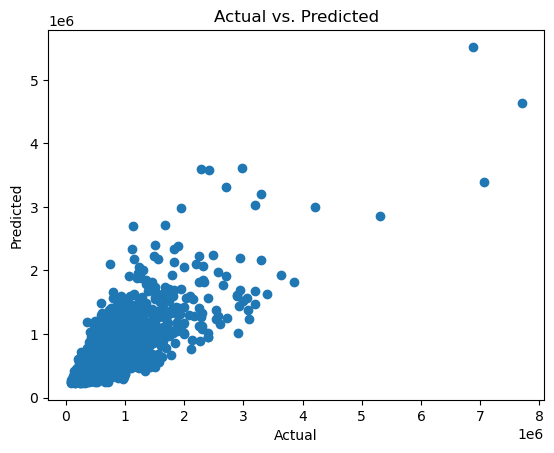

In [102]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

- What type/s of regression have you applied?
Liniar
multi liniar
polynomial

- Which were the challenges?
Determining if outliers needs to be removed.
Feature engineering.

- How accurate is your solution?
Liniar 49 percent explained
multi liniar 59 explained
polynomial 64 explained

- What could be done for further improvement of the accuracy?
Removing outliers